#### 퍼셉트론 (Perceptron)

퍼셉트론은 인공신경망(Artificial Neural Network)의 가장 기본적인 구조로, **1957년 프랭크 로젠블렛(Frank Rosenblatt)**이 제안한 이진 분류기입니다. 입력을 받아 가중치를 곱하고, 이를 모두 더한 뒤, 특정 임계값(threshold)을 기준으로 출력을 결정합니다.

##### 수식으로 표현
퍼셉트론의 출력은 다음과 같이 정의됩니다:

$$
y =
\begin{cases}
1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0 \\
0 & \text{otherwise}
\end{cases}
$$

- **x**: 입력 벡터 (예: [x₁, x₂, ..., xₙ])
- **w**: 가중치 벡터 (예: [w₁, w₂, ..., wₙ])
- **b**: 바이어스 (bias, 편향)
- **y**: 출력 (0 또는 1)

##### 동작 원리
1. 각 입력값에 가중치를 곱합니다.
2. 모든 가중치 합에 바이어스를 더합니다.
3. 이 합이 0보다 크면 출력은 1, 아니면 0입니다.

퍼셉트론은 AND, OR 게이트와 같은 논리 연산을 학습할 수 있습니다. 하지만 XOR 같은 비선형 분리는 하나의 퍼셉트론으로는 불가능하며, 이 한계를 극복하기 위해 다층 퍼셉트론(Multilayer Perceptron, MLP)이 발전하게 되었습니다.

##### 특징
- 선형 분리 가능한 문제만 해결 가능
- 단층 구조
- 가장 기초적인 인공 뉴런 모델

아래는 퍼셉트론을 사용한 AND 게이트 구현 예제입니다.



In [1]:
import numpy as np

# 퍼셉트론 클래스 정의
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.W = np.zeros(input_size + 1)  # 가중치 + 바이어스
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x > 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # 바이어스를 위한 1 추가
        z = np.dot(self.W, x)
        return self.activation_fn(z)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                xi = np.insert(xi, 0, 1)  # 바이어스용 1 추가
                z = np.dot(self.W, xi)
                y_pred = self.activation_fn(z)
                self.W += self.lr * (target - y_pred) * xi

# AND 게이트 학습 데이터
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])  # AND 연산 결과

# 퍼셉트론 학습 및 테스트
p = Perceptron(input_size=2)
p.fit(X, y)

# 예측 결과 출력
for xi in X:
    print(f"입력: {xi}, 출력: {p.predict(xi)}")


입력: [0 0], 출력: 0
입력: [0 1], 출력: 0
입력: [1 0], 출력: 0
입력: [1 1], 출력: 1


#### 퍼셉트론 AND 게이트 학습 + 시각화

이 코드는 2D 입력 데이터를 기반으로 퍼셉트론이 학습한 후, 어떻게 결정 경계를 만들어내는지를 시각적으로 보여줍니다.  
- `fit()` 함수로 퍼셉트론 학습  
- `matplotlib`로 결정 경계 및 데이터 포인트 시각화  
- 각 에포크마다 변화하는 결정 경계 확인 가능


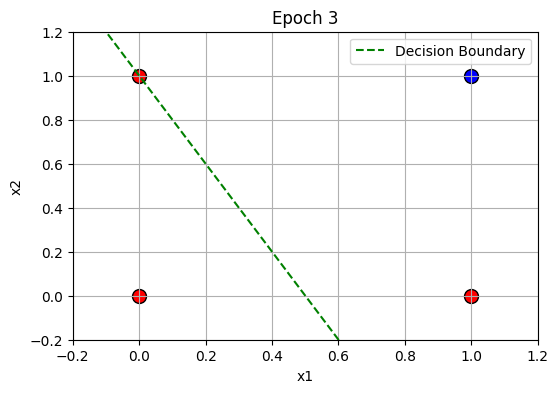

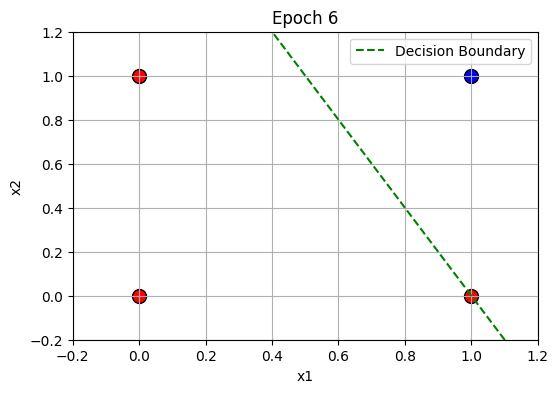

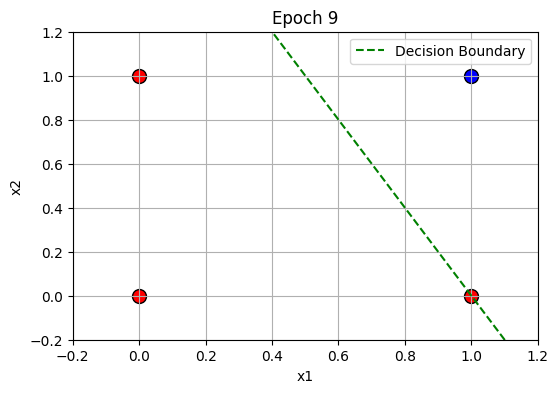

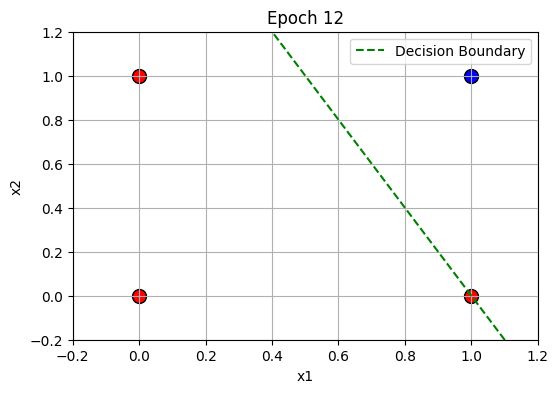

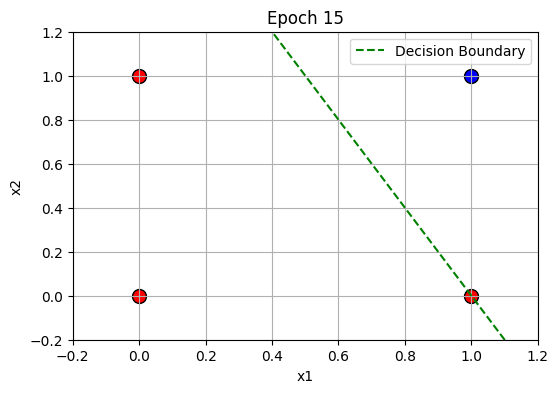

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 퍼셉트론 클래스
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=15):
        self.W = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs
        self.history = []

    def activation_fn(self, x):
        return 1 if x > 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        return self.activation_fn(np.dot(self.W, x))

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                xi_bias = np.insert(xi, 0, 1)
                z = np.dot(self.W, xi_bias)
                y_pred = self.activation_fn(z)
                self.W += self.lr * (target - y_pred) * xi_bias
            self.history.append(self.W.copy())

# 학습 데이터
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# 학습
model = Perceptron(input_size=2, lr=0.2, epochs=15)
model.fit(X, y)

# 시각화 함수
def plot_decision_boundary(X, y, W, epoch):
    plt.figure(figsize=(6, 4))
    for i in range(len(X)):
        color = 'red' if y[i] == 0 else 'blue'
        plt.scatter(X[i][0], X[i][1], c=color, s=100, edgecolors='k')

    x1_vals = np.linspace(-0.2, 1.2, 100)
    if W[2] != 0:
        x2_vals = -(W[0] + W[1] * x1_vals) / W[2]
        plt.plot(x1_vals, x2_vals, 'g--', label='Decision Boundary')
    else:
        plt.axvline(x=-W[0]/W[1], color='g', linestyle='--')

    plt.title(f"Epoch {epoch+1}")
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()
    plt.show()

# 에포크마다 출력하되, 간격은 3 에포크
for i, W in enumerate(model.history):
    if (i+1) % 3 == 0 or i == len(model.history) - 1:
        plot_decision_boundary(X, y, W, i)


### 다층 퍼셉트론 (MLP, Multi-Layer Perceptron)

다층 퍼셉트론은 퍼셉트론의 한계를 극복하기 위해 만들어진 구조로, 하나 이상의 은닉층(hidden layer)을 포함한 인공 신경망이다. 퍼셉트론은 선형 분리 문제만 해결할 수 있지만, MLP는 비선형 문제도 해결할 수 있다.

#### 구조
MLP는 다음과 같은 층으로 구성된다:
- 입력층 (Input Layer)
- 하나 이상의 은닉층 (Hidden Layer)
- 출력층 (Output Layer)

각 층은 여러 뉴런으로 구성되며, 각 뉴런은 다음 수식을 따른다:

$$
a = \phi(Wx + b)
$$

- \( W \): 가중치(weight)
- \( x \): 입력 벡터
- \( b \): 바이어스
- \( \phi \): 비선형 활성화 함수 (예: ReLU, Sigmoid 등)
- \( a \): 뉴런 출력값

#### 특징
- 비선형 활성화 함수 덕분에 복잡한 함수를 근사할 수 있다.
- 손실 함수(Loss)를 최소화하기 위해 경사하강법 + 역전파 알고리즘을 사용한다.
- 대표적인 예제는 XOR 문제 해결, 이미지 분류(MNIST) 등이다.


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 다층 퍼셉트론 정의: 입력 2차원, 은닉층 1개 (4개 뉴런), 출력 1차원
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # 입력층 → 은닉층
        self.fc2 = nn.Linear(4, 1)  # 은닉층 → 출력층

    def forward(self, x):
        x = F.relu(self.fc1(x))           # ReLU 활성화 함수
        x = torch.sigmoid(self.fc2(x))    # 이진 분류용 Sigmoid
        return x

# 모델 생성
model = MLP()

# 예제 입력 데이터 (예: XOR 문제)
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])

# 출력 확인
output = model(x)
print("MLP 출력:\n", output)


MLP 출력:
 tensor([[0.4605],
        [0.4891],
        [0.4546],
        [0.5111]], grad_fn=<SigmoidBackward0>)


Epoch 0, Loss: 0.6967
Epoch 1000, Loss: 0.3526
Epoch 2000, Loss: 0.3486
Epoch 3000, Loss: 0.3477
Epoch 4000, Loss: 0.3474
Epoch 5000, Loss: 0.3472
Epoch 6000, Loss: 0.3470
Epoch 7000, Loss: 0.3470
Epoch 8000, Loss: 0.3469
Epoch 9000, Loss: 0.3469

입력값에 대한 최종 예측:
입력: [0.0, 0.0], 예측: 0.0, 정답: 0
입력: [0.0, 1.0], 예측: 1.0, 정답: 1
입력: [1.0, 0.0], 예측: 0.0, 정답: 1
입력: [1.0, 1.0], 예측: 0.0, 정답: 0


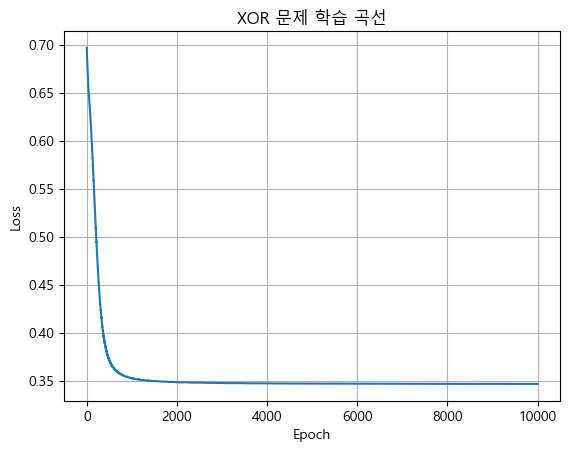

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 데이터 정의 (XOR 문제)
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # 은닉층 4개 뉴런
        self.fc2 = nn.Linear(4, 1)  # 출력층

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# 모델, 손실 함수, 옵티마이저
model = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 학습 루프
epochs = 10000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    losses.append(loss.item())

# 예측 출력
with torch.no_grad():
    pred = model(x).round()
    print("\n입력값에 대한 최종 예측:")
    for i in range(len(x)):
        print(f"입력: {x[i].tolist()}, 예측: {pred[i].item()}, 정답: {int(y[i].item())}")

# 학습 곡선 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("XOR 문제 학습 곡선")
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.6975
Epoch 1000, Loss: 0.0007
Epoch 2000, Loss: 0.0002
Epoch 3000, Loss: 0.0001
Epoch 4000, Loss: 0.0000
Epoch 5000, Loss: 0.0000
Epoch 6000, Loss: 0.0000
Epoch 7000, Loss: 0.0000
Epoch 8000, Loss: 0.0000
Epoch 9000, Loss: 0.0000
Epoch 10000, Loss: 0.0000

입력값에 대한 최종 예측:
입력: [0.0, 0.0], 예측: 0, 정답: 0
입력: [0.0, 1.0], 예측: 1, 정답: 1
입력: [1.0, 0.0], 예측: 1, 정답: 1
입력: [1.0, 1.0], 예측: 0, 정답: 0


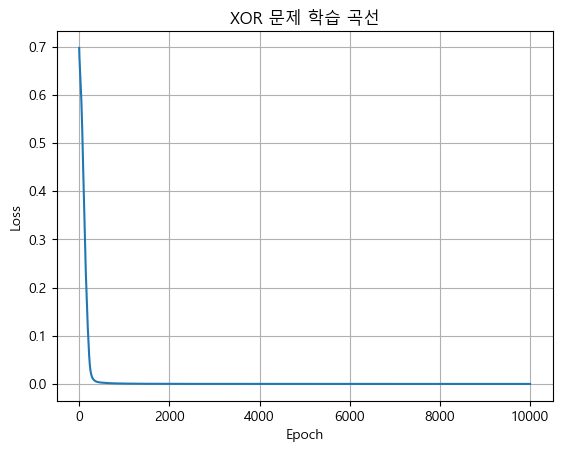

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# XOR 데이터
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

# 모델 정의 (은닉층 8개 뉴런)
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# 모델, 손실, 옵티마이저
model = MLP()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 루프
losses = []
for epoch in range(10001):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    losses.append(loss.item())

# 예측 출력
with torch.no_grad():
    pred = model(x).round()
    print("\n입력값에 대한 최종 예측:")
    for i in range(len(x)):
        print(f"입력: {x[i].tolist()}, 예측: {int(pred[i].item())}, 정답: {int(y[i].item())}")

# 학습 곡선 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("XOR 문제 학습 곡선")
plt.grid(True)
plt.show()


### 다층 퍼셉트론(MLP)으로 `mnist_test.csv` 손글씨 숫자 분류하기

이 노트북에서는 Kaggle에서 제공한 `mnist_test.csv` 파일을 직접 불러와서  
다층 퍼셉트론(MLP)을 사용하여 숫자 인식 문제를 해결한다.

- 입력: 784차원 (28×28) 이미지 픽셀 벡터
- 출력: 0~9 사이의 정수 (10개 클래스)
- 손실 함수: CrossEntropyLoss
- 활성화 함수: ReLU, 출력에는 Softmax 생략 (CrossEntropyLoss가 포함)
- 옵티마이저: Adam

---


Epoch 1, Loss: 113.3869
Epoch 2, Loss: 39.9283
Epoch 3, Loss: 30.4589
Epoch 4, Loss: 25.3715
Epoch 5, Loss: 20.6581
Epoch 6, Loss: 17.2453
Epoch 7, Loss: 14.2484
Epoch 8, Loss: 12.1478
Epoch 9, Loss: 10.3493
Epoch 10, Loss: 8.2641

테스트 정확도: 0.9395


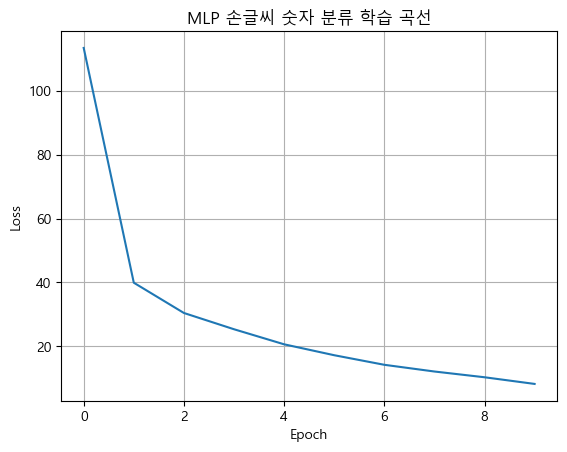

In [6]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("data/MNIST/mnist_test.csv")
X = df.iloc[:, 1:].values / 255.0  # 0~1 정규화
y = df.iloc[:, 0].values           # 정답: 0~9

# 2. 학습/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test  = torch.tensor(X_test,  dtype=torch.float32)
y_test  = torch.tensor(y_test,  dtype=torch.long)

# 4. DataLoader 생성
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test, y_test), batch_size=1000, shuffle=False)

# 5. 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MLP()

# 6. 손실 함수, 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. 학습 루프
epochs = 10
losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# 8. 테스트 정확도 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        pred = output.argmax(dim=1)
        correct += (pred == batch_y).sum().item()
        total += batch_y.size(0)

print(f"\n테스트 정확도: {correct / total:.4f}")

# 9. 학습 곡선 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP 손글씨 숫자 분류 학습 곡선")
plt.grid(True)
plt.show()


In [7]:
# 모델 저장 (파일명 자유롭게)
torch.save(model.state_dict(), "mlp_mnist_model.pth")
print("모델 저장 완료")


모델 저장 완료


In [8]:
model = MLP()
model.load_state_dict(torch.load("mlp_mnist_model.pth"))
model.eval()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16908\2959199490.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mlp_mnist_mode

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

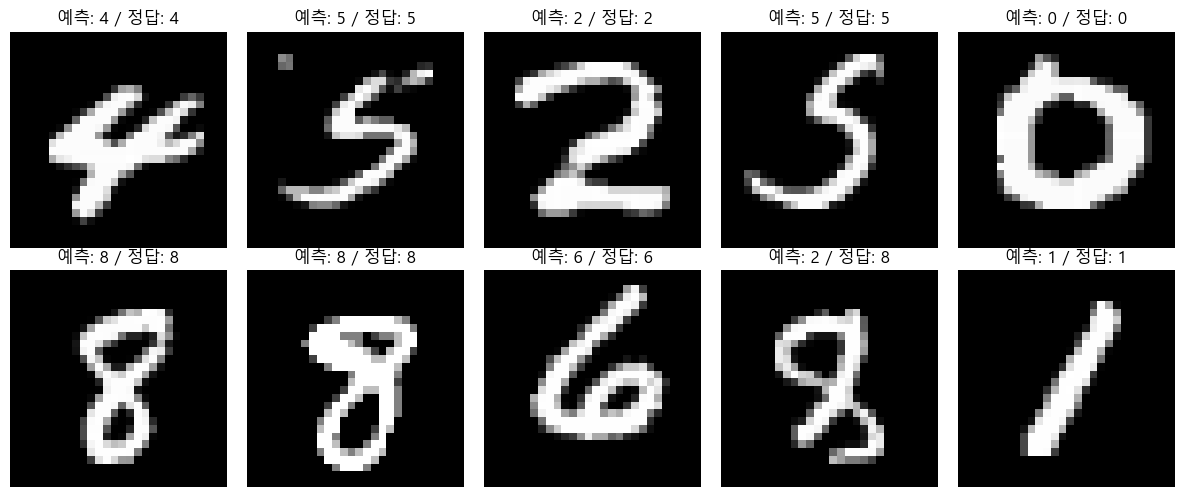

In [10]:
import random

# 임의로 10개 샘플 추출
model.eval()
fig, axs = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axs.flat):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx].reshape(28, 28)
    label = y_test[idx].item()

    with torch.no_grad():
        pred = model(X_test[idx].unsqueeze(0)).argmax().item()

    ax.imshow(img, cmap='gray')
    ax.set_title(f"예측: {pred} / 정답: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### CNN(합성곱 신경망)의 구조 이해

CNN(Convolutional Neural Network)은 이미지나 영상과 같은 2차원 데이터를 처리하기 위해 설계된 신경망 구조입니다.  
MLP는 입력 데이터를 1차원 벡터로 평탄화해야 하지만, CNN은 **공간 정보(위치, 형태)**를 보존한 채 학습할 수 있다는 장점이 있습니다.

---

#### 1. 합성곱(Convolution)

- **커널 (Kernel) 또는 필터 (Filter)**: 작은 크기의 가중치 행렬로, 입력 이미지 위를 슬라이딩하면서 특정 특징(모서리, 패턴 등)을 감지합니다.
- **스트라이드 (Stride)**: 커널이 한 번에 이동하는 칸 수입니다. 기본값은 1이며, 클수록 출력의 크기가 작아집니다.
- **패딩 (Padding)**: 커널이 이미지의 가장자리를 탐색할 수 있도록 입력 주변에 0을 추가하는 기법입니다.

##### 예시
- 입력: 28×28 이미지
- 커널: 3×3
- 스트라이드: 1
- 패딩: 0 (valid), 1 (same)

출력 크기 계산 공식:

$$
O = \left\lfloor \frac{(I + 2P - K)}{S} \right\rfloor + 1
$$

- \( I \): 입력 크기
- \( K \): 커널 크기
- \( P \): 패딩 크기
- \( S \): 스트라이드

---

#### 2. 풀링 (Pooling)

풀링은 이미지의 해상도를 줄이면서 주요 특징만 남기는 다운샘플링 과정입니다.

- **MaxPooling**: 영역 내 최대값 추출 (가장 흔히 사용됨)
- **AveragePooling**: 영역 내 평균값 추출

##### 예시
- 2×2 MaxPooling → 4개의 픽셀 중 최대값 하나만 남김
- 크기를 줄이며, 연산량 감소 + 과적합 방지 효과 있음

---

#### 3. CNN의 기본 구조 예시

1. 입력 이미지 (28×28)
2. Conv2D(커널 3×3, 32개) + ReLU
3. MaxPooling(2×2)
4. Conv2D(커널 3×3, 64개) + ReLU
5. MaxPooling(2×2)
6. Flatten → FC(fully connected) → 출력층(Softmax)

---

#### 요약

| 구성 요소 | 역할 |
|-----------|------|
| **Conv2D** | 이미지 특징 추출 (커널로 필터링) |
| **ReLU** | 비선형성 도입 |
| **Pooling** | 다운샘플링으로 과적합 방지 |
| **FC Layer** | 최종 분류 수행 |

CNN은 시각 정보를 직접 다루기에, 이미지 분류, 물체 탐지, 얼굴 인식 등에서 핵심적으로 사용됩니다.

---


Epoch 1, Loss: 73.1146
Epoch 2, Loss: 16.4085
Epoch 3, Loss: 9.9741
Epoch 4, Loss: 6.3395
Epoch 5, Loss: 4.5361
Epoch 6, Loss: 3.7842
Epoch 7, Loss: 3.2166
Epoch 8, Loss: 1.4331
Epoch 9, Loss: 1.6313
Epoch 10, Loss: 1.2244

테스트 정확도: 0.9750


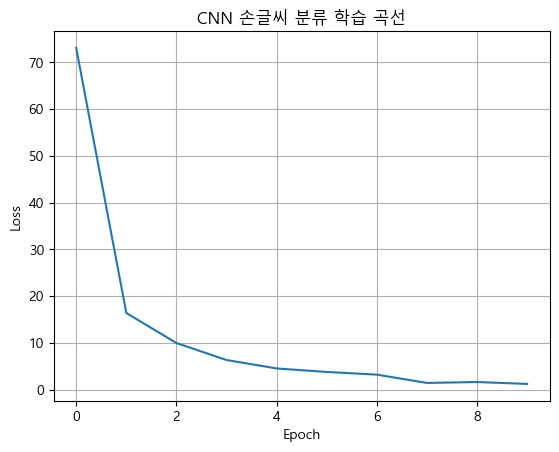

In [12]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. CSV 데이터 불러오기
df = pd.read_csv("data/MNIST/mnist_test.csv")
X = df.iloc[:, 1:].values / 255.0  # 정규화
y = df.iloc[:, 0].values

# 2. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. 텐서 변환 + reshape (CNN용 1채널 이미지로)
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 28, 28)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test  = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 28, 28)
y_test  = torch.tensor(y_test, dtype=torch.long)

# 4. DataLoader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test, y_test), batch_size=1000, shuffle=False)

# 5. CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)   # (B, 32, 28, 28)
        self.pool1 = nn.MaxPool2d(2, 2)               # (B, 32, 14, 14)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # (B, 64, 14, 14)
        self.pool2 = nn.MaxPool2d(2, 2)               # (B, 64, 7, 7)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

# 6. 손실함수 & 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. 학습 루프
epochs = 10
losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# 8. 테스트 정확도
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        pred = output.argmax(dim=1)
        correct += (pred == batch_y).sum().item()
        total += batch_y.size(0)

print(f"\n테스트 정확도: {correct / total:.4f}")

# 9. 학습 곡선 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN 손글씨 분류 학습 곡선")
plt.grid(True)
plt.show()


In [13]:
# 모델 저장 (학습 완료 후)
torch.save(model.state_dict(), "cnn_mnist_model.pth")
print("모델 저장 완료")


모델 저장 완료


In [14]:
# 모델 클래스 정의는 동일하게 유지해야 함
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 새 인스턴스 생성 후 가중치 불러오기
model = SimpleCNN()
model.load_state_dict(torch.load("cnn_mnist_model.pth"))
model.eval()

print("모델 불러오기 완료")


모델 불러오기 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16908\1577557388.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cnn_mnist_mod

In [15]:
# 테스트 데이터 1개 예측
sample = X_test[0].unsqueeze(0)  # (1, 1, 28, 28)
pred = model(sample).argmax(dim=1).item()

print("예측값:", pred)
print("정답:", y_test[0].item())


예측값: 6
정답: 6


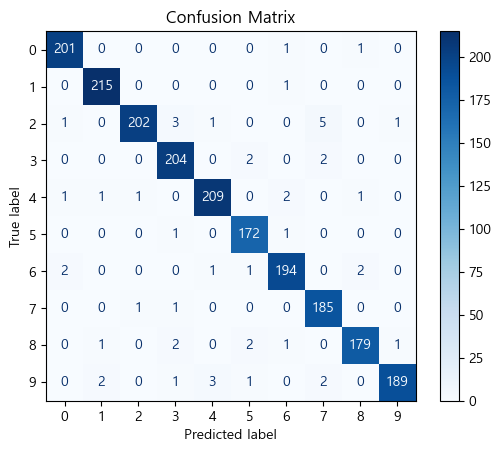

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 예측값/실제값 모으기
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        pred = output.argmax(dim=1)
        all_preds.extend(pred.tolist())
        all_labels.extend(batch_y.tolist())

# 혼동 행렬 생성
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### ✅ Dropout & BatchNorm 추가 실험: 과적합 방지 및 성능 개선 확인

이 실험에서는 CNN 모델에 **Dropout**과 **Batch Normalization**을 추가하여  
실제로 **과적합을 방지하고 성능이 향상되는지** 확인한다.

#### 🧪 실험 목적
- **기존 CNN 모델**: 일반 Conv → ReLU → Pooling만 사용
- **개선 CNN 모델**: Conv → BatchNorm → ReLU → Pooling → Dropout 적용
- 동일한 데이터셋, 학습 조건 하에서 정확도 비교

#### 📌 실험 조건
- 데이터: `mnist_test.csv` (훈련/테스트 80:20 분할)
- epoch: 10
- optimizer: Adam (lr=0.001)
- 모델 출력: 최종 테스트 정확도 + 학습 손실 시각화

#### ✅ 기대 효과
- Dropout: 훈련 중 무작위로 뉴런을 끄며 과적합 방지
- BatchNorm: 학습을 안정화하고 빠르게 수렴
- 전체적으로 **일반화 성능 향상 (테스트 정확도 증가)** 예상

---


In [17]:
import torch.nn as nn
import torch.nn.functional as F

# 개선된 CNN 모델 정의
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.drop2 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.drop3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.drop1(x)
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.drop2(x)
        x = x.view(x.size(0), -1)
        x = self.drop3(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 모델 생성 및 학습
model = ImprovedCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# 테스트 정확도 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        pred = output.argmax(dim=1)
        correct += (pred == batch_y).sum().item()
        total += batch_y.size(0)

acc_improved = correct / total
print(f"\n개선 CNN 테스트 정확도: {acc_improved:.4f}")


Epoch 1, Loss: 89.2558
Epoch 2, Loss: 31.3111
Epoch 3, Loss: 23.3995
Epoch 4, Loss: 18.9645
Epoch 5, Loss: 16.1712
Epoch 6, Loss: 13.9780
Epoch 7, Loss: 13.3601
Epoch 8, Loss: 12.3709
Epoch 9, Loss: 11.5670
Epoch 10, Loss: 10.9339

개선 CNN 테스트 정확도: 0.9800
